#### Rex Gayas
#### Week 12 12.2 Project Milestone 5 Spring 2024
#### DSC410-T301 Predictive Analytics (2245-1)
#### Final Project & Further Investigation (Logistic Regression)

#### Data Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diabetic_data = pd.read_csv(r'D:\ALPHA\Dynamic Folder\Bellevue\Spring 2024\Predictive Analytics\Project\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv')


# Data description
print(diabetic_data.describe())
print(diabetic_data.info())

# Check the first few rows to understand what the data looks like
print(diabetic_data.head())


       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

The dataset is a collection from 130 US hospitals concerning encounters with diabetic patients from 1999-2008. It comprises over 100,000 records and 50 attributes, including patient number, race, gender, age, weight, admission type, time in hospital, medical specialty, and various results from lab tests. 

#### Handling Missing Data in the 'Weight' Column

In [2]:
import pandas as pd

# Define the file paths
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv"
updated_file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/updated_diabetic_data.csv"

# Load the dataset
diabetic_data = pd.read_csv(file_path)

# Count of missing values in the 'weight' column represented by '?'
missing_weight_count = (diabetic_data['weight'] == '?').sum()
print(f"Count of missing values in 'weight': {missing_weight_count}")

# Dropping the 'weight' column
diabetic_data.drop('weight', axis=1, inplace=True)

# Saving the updated dataset without the 'weight' column
diabetic_data.to_csv(updated_file_path, index=False)

print("The 'weight' column has been dropped and the updated dataset is saved.")



Count of missing values in 'weight': 98569
The 'weight' column has been dropped and the updated dataset is saved.


The weight column in the dataset has a significantly high proportion of missing data, with approximately 96.86% of the values being missing. This poses a substantial challenge for any analytical or predictive modeling tasks, as such a large amount of missing information can severely bias the results if not addressed properly. Given the severity of missing data, the most straightforward and statistically sound approach is to remove this column from the dataset.

#### Variable Types

In [3]:
import pandas as pd

# Define numerical and categorical variables 
numerical_variables = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_outpatient', 'number_emergency',
    'number_inpatient', 'number_diagnoses'
]

categorical_variables = [
    'race', 'gender', 'age', 'weight', 'admission_type_id',
    'discharge_disposition_id', 'admission_source_id', 'medical_specialty',
    # Medication refers to all medication columns provided in the dataset
    'metformin', 'repaglinide', 'nateglinide', # etc...
]

# Create a DataFrame for numerical variables
numerical_df = pd.DataFrame({'Numerical Variables': numerical_variables})

# Create a DataFrame for categorical variables
categorical_df = pd.DataFrame({'Categorical Variables': categorical_variables})

# Display the DataFrames
print("Numerical Variables Table:")
print(numerical_df)
print("\nCategorical Variables Table:")
print(categorical_df)


Numerical Variables Table:
  Numerical Variables
0    time_in_hospital
1  num_lab_procedures
2      num_procedures
3     num_medications
4   number_outpatient
5    number_emergency
6    number_inpatient
7    number_diagnoses

Categorical Variables Table:
       Categorical Variables
0                       race
1                     gender
2                        age
3                     weight
4          admission_type_id
5   discharge_disposition_id
6        admission_source_id
7          medical_specialty
8                  metformin
9                repaglinide
10               nateglinide


There are numerical variables which are quantities that can be measured. They can be further classified into discrete (e.g., the number of times a patient was admitted to the hospital) or continuous variables (e.g., patient's age).

There are categorical variables; these are qualitative and describe a quality or characteristic. They can be nominal (e.g., race, gender, which don't have a particular order) or ordinal (e.g., age categorized into ranges like 0-10, 10-20, which has a meaningful order).

#### Initial Data Cleaning

In [4]:
import pandas as pd

# Define the file path for the updated dataset
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/updated_diabetic_data.csv"

# Load the dataset
diabetic_data = pd.read_csv(file_path)

# Identify object columns
object_columns = diabetic_data.select_dtypes(include=['object']).columns

# Apply vectorized string operations for cleaning
for column in object_columns:
    if diabetic_data[column].dtype == 'object':
        # Check if a column contains string representations of numbers (possibly with misplaced commas or 'x's)
        # Remove commas and 'x's, then convert the column to numeric
        diabetic_data[column] = pd.to_numeric(diabetic_data[column].str.replace('[,x]', '', regex=True), errors='coerce')

# Check the new data types after cleaning
data_types_after_optimized_cleaning = diabetic_data.dtypes

print(data_types_after_optimized_cleaning)


encounter_id                  int64
patient_nbr                   int64
race                        float64
gender                      float64
age                         float64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                  float64
medical_specialty           float64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum               float64
A1Cresult                   float64
metformin                   float64
repaglinide                 float64
nateglinide                 float64
chlorpropamide              float64
glimepiride                 

Several columns that were originally of the object type and contained numeric-like data have been converted to float64. This includes columns that likely represent categorical data coded as numbers, which is why they're showing up as float64 after conversion. These columns should be reviewed to confirm which should be converted back to categorical (object or category type) and address the missing values as NaNs introduced during coercion.

#### Categorical Conversion

In [5]:
# Convert columns to 'category' data type
categorical_columns = [
    'race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 
    'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult',
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
    'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone',
    'change', 'diabetesMed', 'readmitted'
]

for column in categorical_columns:
    if column in diabetic_data.columns:
        diabetic_data[column] = diabetic_data[column].astype('category')

# Check for missing values in the dataset
missing_values_after_reverting = diabetic_data.isnull().sum()

# Output the updated data types and missing values information
data_types_after_reverting = diabetic_data.dtypes

print(missing_values_after_reverting, data_types_after_reverting)



encounter_id                     0
patient_nbr                      0
race                        101766
gender                      101766
age                         101766
admission_type_id                0
discharge_disposition_id         0
admission_source_id              0
time_in_hospital                 0
payer_code                  101766
medical_specialty           101766
num_lab_procedures               0
num_procedures                   0
num_medications                  0
number_outpatient                0
number_emergency                 0
number_inpatient                 0
diag_1                        1666
diag_2                        2894
diag_3                        6481
number_diagnoses                 0
max_glu_serum               101766
A1Cresult                   101766
metformin                   101766
repaglinide                 101766
nateglinide                 101766
chlorpropamide              101766
glimepiride                 101766
acetohexamide       

Identified columns in the dataset that represent categorical data and converted their data types from float64 to category. This conversion aligns the data types with the nature of the data, ensuring that categorical variables are treated appropriately in subsequent analyses. The process also involved identifying missing values, which are now accurately represented as NaNs within these categorical columns.

#### Updated Missing Value Imputation Strategy

In [6]:
import pandas as pd

# Define the file path for the updated dataset
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/updated_diabetic_data.csv"

# Load the dataset
diabetic_data = pd.read_csv(file_path)

# Impute missing values for categorical columns, excluding 'max_glu_serum' and 'A1Cresult'
categorical_columns = diabetic_data.select_dtypes(include=['category']).columns.difference(['max_glu_serum', 'A1Cresult'])
for column in categorical_columns:
    diabetic_data[column] = diabetic_data[column].cat.add_categories(['Unknown']).fillna('Unknown')

# Impute missing values for numerical columns, ensuring not to include the excluded columns
numerical_columns = diabetic_data.select_dtypes(include=['int64', 'float64']).columns
excluded_columns = ['max_glu_serum', 'A1Cresult']  # Columns not to impute
for column in numerical_columns:
    if diabetic_data[column].isnull().any() and column not in excluded_columns:
        median_value = diabetic_data[column].median()
        diabetic_data[column] = diabetic_data[column].fillna(median_value)

# Save the changes into a new updated file
updated_file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/further_updated_diabetic_data.csv"
diabetic_data.to_csv(updated_file_path, index=False)

# Check the missing values count after imputation
missing_values_after_imputation = diabetic_data.isnull().sum()

print(missing_values_after_imputation)



encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

For categorical columns, missing values were handled by adding “Unknown” as a category and then filling any missing entries with this label. This makes sure that all categorical data maintains a consistent format without introducing statistical biases associated with arbitrary fill values. Numerical columns with missing data were imputed using the median value of each column. This method was selected to preserve the statistical distribution of numerical data as closely as possible, avoiding the influence of outliers. With Professor Neugebauer’s guidance, the columns “max_glu_serum” and “A1Cresult” were excluded from any imputation process as to avoid altering the statistical makeup of these features. 

#### Exploratory Data Analysis

C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RexAr\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

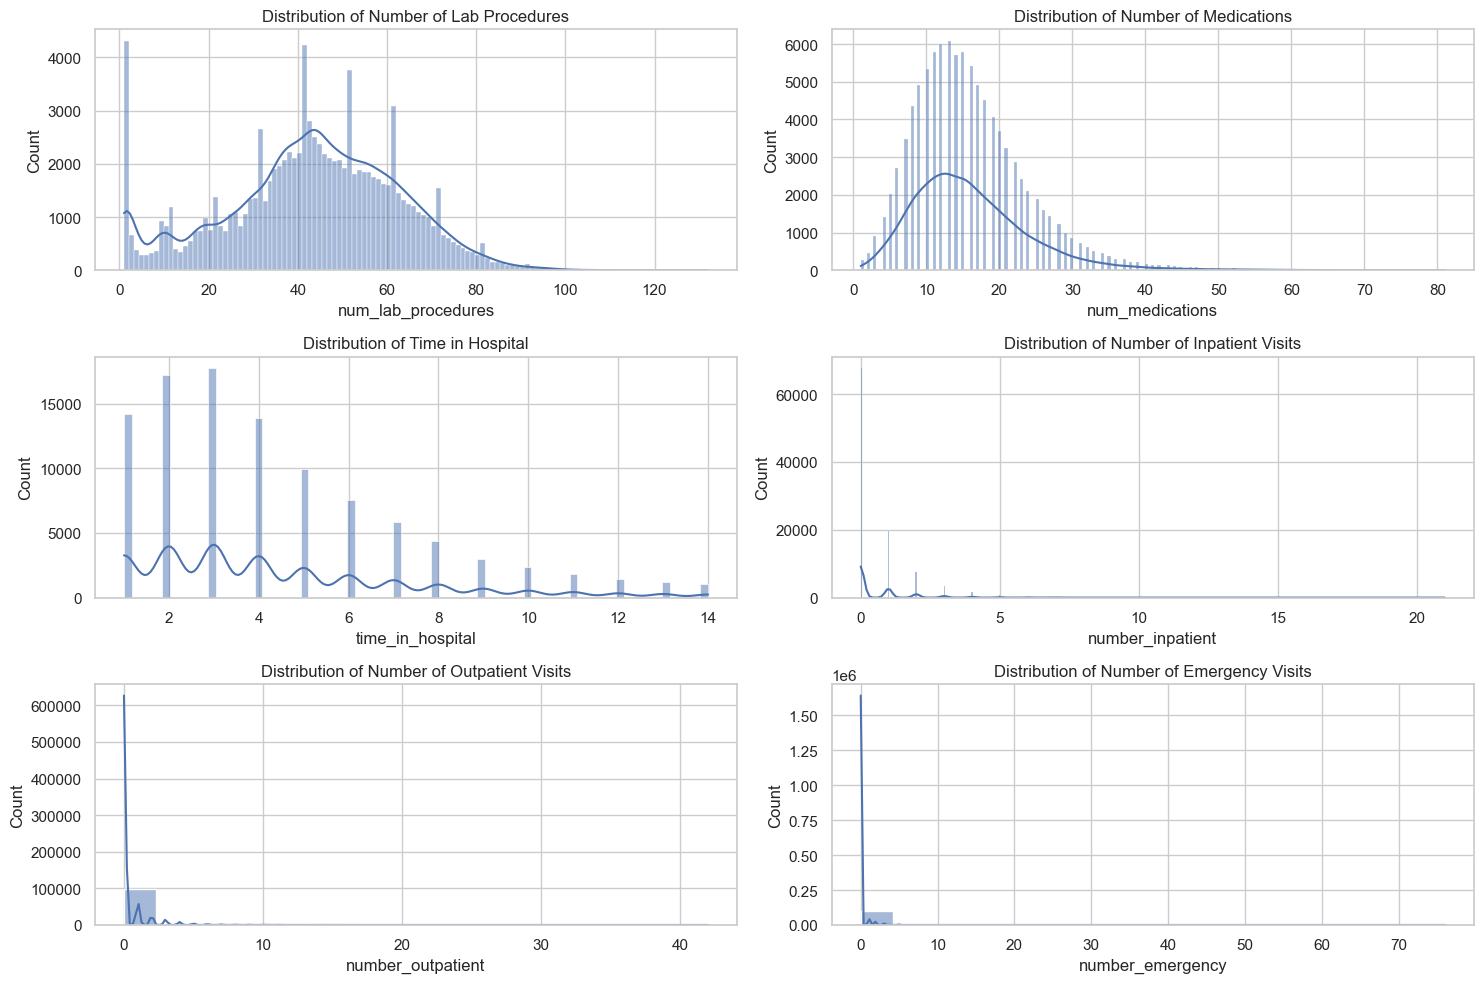

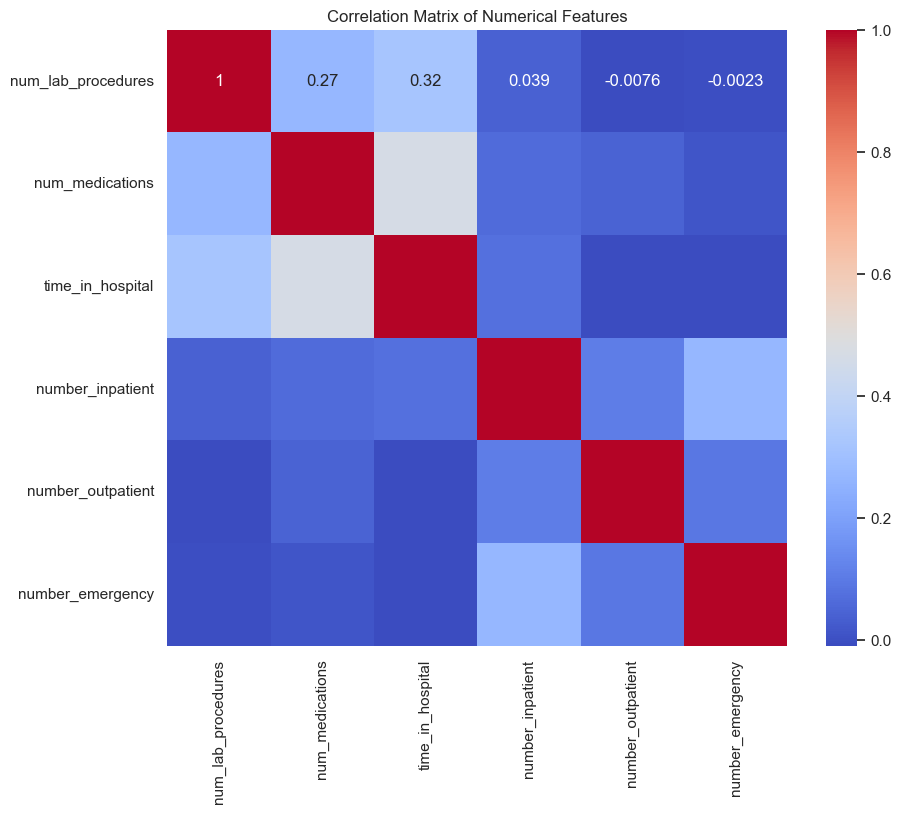

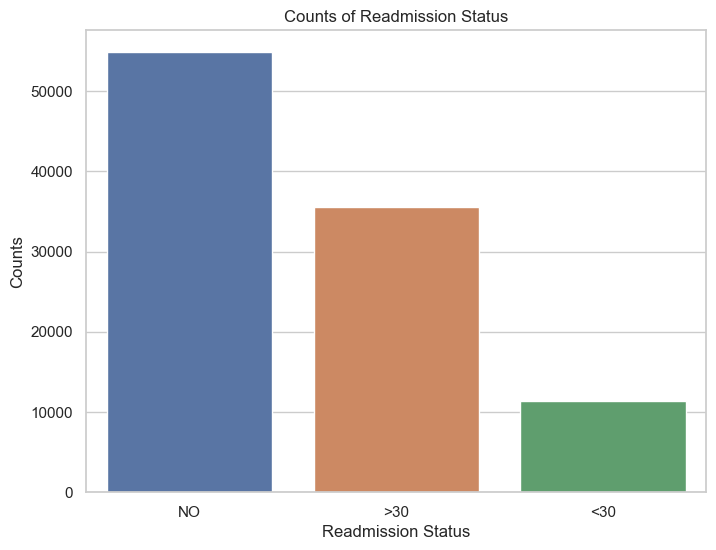

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Setting the seaborn style
sns.set(style="whitegrid") 

# Distribution analysis for key numerical features 
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(diabetic_data['num_lab_procedures'], kde=True)
plt.title('Distribution of Number of Lab Procedures')

plt.subplot(3, 2, 2)
sns.histplot(diabetic_data['num_medications'], kde=True)
plt.title('Distribution of Number of Medications')

plt.subplot(3, 2, 3)
sns.histplot(diabetic_data['time_in_hospital'], kde=True)
plt.title('Distribution of Time in Hospital')

plt.subplot(3, 2, 4)
sns.histplot(diabetic_data['number_inpatient'], kde=True)
plt.title('Distribution of Number of Inpatient Visits')

plt.subplot(3, 2, 5)
sns.histplot(diabetic_data['number_outpatient'], kde=True)
plt.title('Distribution of Number of Outpatient Visits')

plt.subplot(3, 2, 6)
sns.histplot(diabetic_data['number_emergency'], kde=True)
plt.title('Distribution of Number of Emergency Visits')

plt.tight_layout()

# Correlation matrix visualization 
plt.figure(figsize=(10, 8))
correlation_matrix = diabetic_data[['num_lab_procedures', 'num_medications', 'time_in_hospital', 'number_inpatient', 'number_outpatient', 'number_emergency']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')

# Bar plot for the 'readmitted' target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='readmitted', data=diabetic_data)
plt.title('Counts of Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Counts')

plt.show()


Examined the diabetic patient dataset and focused on variables relevant to hospital readmissions. Computed summary statistics for key features like lab procedures, medication counts, and hospital stay duration. Histograms showed the distribution of these numerical features, revealing their spread and tendencies. A heatmap displayed the correlation between numerical features, highlighting potential relationships important for predictive modeling. Visualized the distribution of the readmitted target variable through a bar chart. The visualizations show a wide range of values for the number of lab procedures and medications, with a general trend towards shorter hospital stays and fewer inpatient, outpatient, and emergency visits. The readmission status may serve as a foundation for modeling readmission risks.

#### Outlier Identification

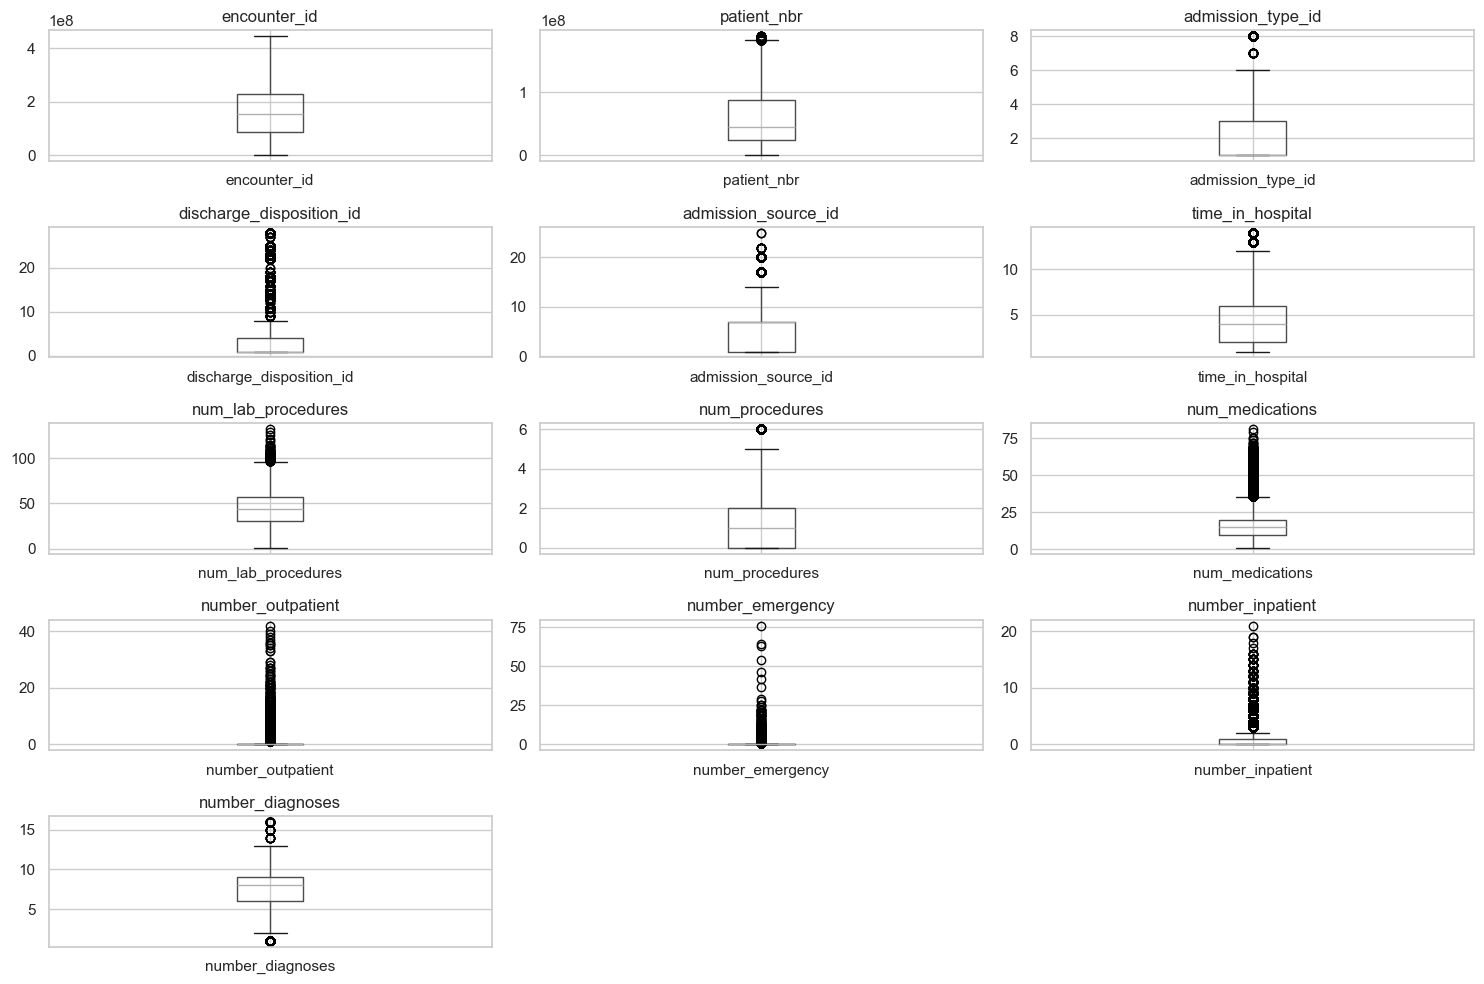

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the latest path
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/further_updated_diabetic_data.csv"
diabetic_data = pd.read_csv(file_path)

# Identifying numerical columns for the outlier analysis
numerical_columns = diabetic_data.select_dtypes(include=['int64', 'float64']).columns

# Plotting boxplots for each numerical variable
plt.figure(figsize=(15, 10))
for index, column in enumerate(numerical_columns):
    plt.subplot((len(numerical_columns) // 3) + 1, 3, index + 1)
    diabetic_data.boxplot(column)
    plt.title(column)

plt.tight_layout()
plt.show()




Plotted boxplots for each numerical variable in the dataset. These plots highlighted the potential outliers, especially visible as points that fall outside of the whiskers of the boxplots. Some variables, like num_medications, number_outpatient, number_emergency, and number_inpatient, show a significant number of points beyond the upper whisker, indicating the presence of outliers.

It would be necessary to study these outliers and decide whether they should be kept if they represent true extreme values that are important for prediction, capping them at a certain value, or removing them if they are deemed to be data entry errors or not relevant for the subsequent analysis.

#### Bivariate Relationship Exploration

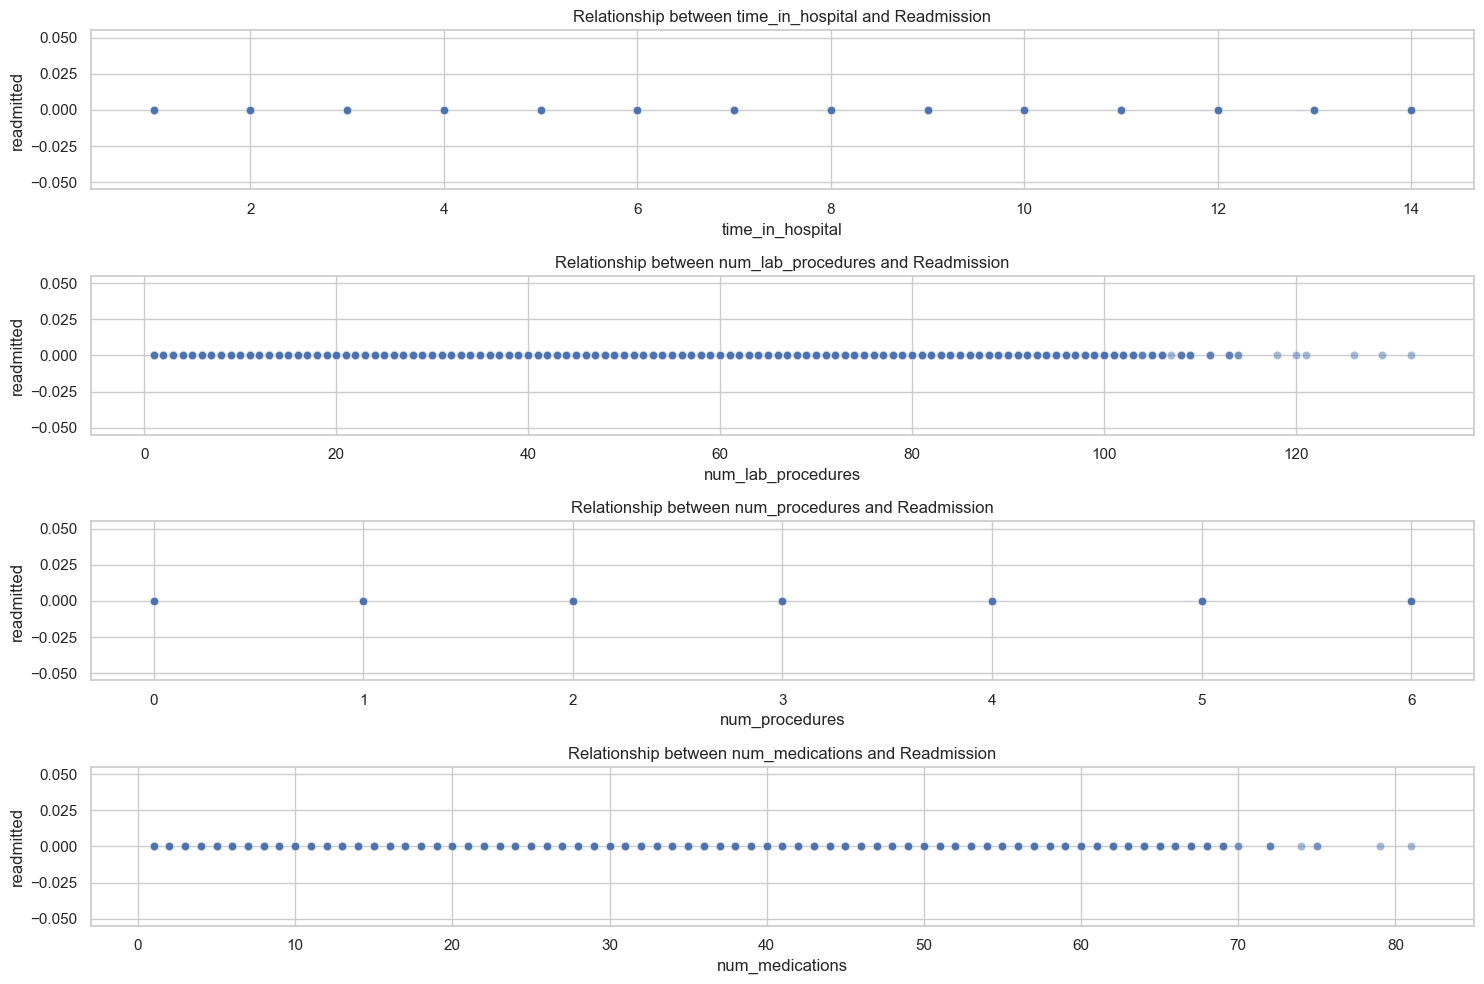

In [9]:
import seaborn as sns

# Considering a few numerical column and the target variable 'readmitted'
# This will need to be encoded numerically for certain types of plots
selected_numerical_columns = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications']
target_variable = 'readmitted'

# Convert the target variable to numeric for plotting 
diabetic_data[target_variable] = diabetic_data[target_variable].apply(lambda x: 1 if x == 'Yes' else 0)

# Plotting scatter plots for selected numerical columns against the target variable
plt.figure(figsize=(15, 10))
for index, column in enumerate(selected_numerical_columns):
    plt.subplot(len(selected_numerical_columns), 1, index + 1)
    sns.scatterplot(data=diabetic_data, x=column, y=target_variable, alpha=0.5)
    plt.title(f'Relationship between {column} and Readmission')
plt.tight_layout()
plt.show()


Created scatter plots to visualize the relationship between selected numerical features and the binary readmission status. These plots attempt to indicate whether there is a linear relationship, clustering, or any other noticeable pattern between these features and readmission. There don't appear to be distinct linear relationships, but these plots are valuable for a first pass at identifying patterns.

#### Feature Correlation Analysis (Pearson)

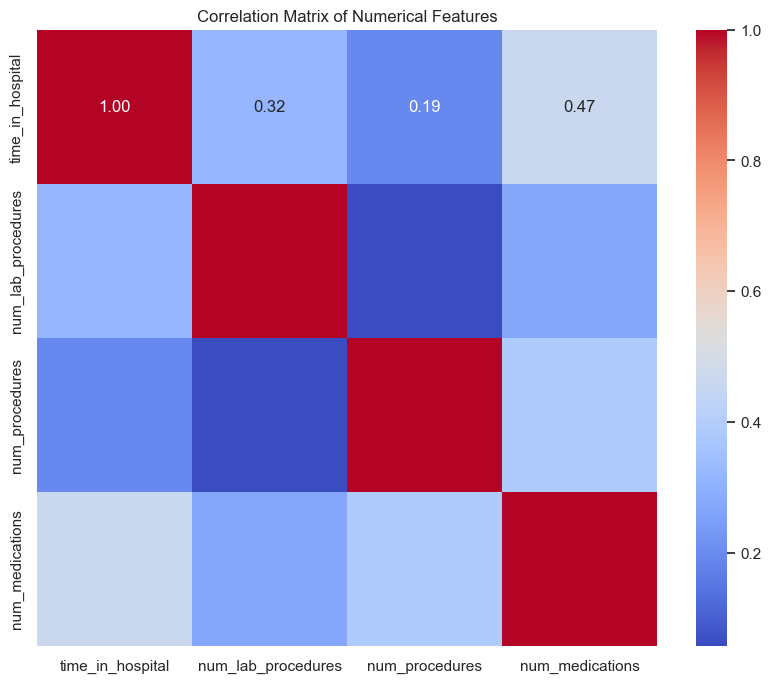

In [10]:
# Calculate the correlation matrix for numerical features
correlation_matrix = diabetic_data[selected_numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


The heatmap above displays the Pearson correlation coefficients between selected numerical features. The correlations range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

From the heatmap, it was noted that time_in_hospital has a moderate positive correlation with num_medications, which might indicate that longer hospital stays could involve more medications. num_lab_procedures and num_procedures have lower correlations with other variables, suggesting they might provide unique information not represented by other features. No extremely high correlations are evident among these selected features, which reduces concerns about multicollinearity in these data.

#### Categorical Feature Reduction and Encoding (Week 5)

In [11]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Load the dataset from the latest path
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/further_updated_diabetic_data.csv"
diabetic_data = pd.read_csv(file_path)

# Categorical feature reduction and encoding
categorical_columns = diabetic_data.select_dtypes(include=['object', 'category']).columns
threshold = 100
for column in categorical_columns:
    counts = diabetic_data[column].value_counts()
    other_categories = counts[counts < threshold].index
    diabetic_data[column] = diabetic_data[column].replace(other_categories, 'Other')

encoder = OneHotEncoder(drop='first')
sparse_encoded_features = encoder.fit_transform(diabetic_data[categorical_columns])

# Aggregating medication adjustments into a single feature
medication_columns = [col for col in diabetic_data.columns if 'glipizide' in col or 'glyburide' in col or 'pioglitazone' in col or 'rosiglitazone' in col or 'insulin' in col]
def count_medication_changes(row):
    return sum(row[col] in ['Up', 'Down'] for col in medication_columns)

diabetic_data['medication_changes'] = diabetic_data.apply(count_medication_changes, axis=1)

# Normalization of numerical features for model input
numerical_columns = diabetic_data.select_dtypes(include=['int64', 'float64']).columns.difference(['encounter_id', 'patient_nbr', 'medication_changes'])
scaler = MinMaxScaler()
diabetic_data[numerical_columns] = scaler.fit_transform(diabetic_data[numerical_columns])

# Check results
print("Sparse matrix shape:", sparse_encoded_features.shape)
print("First few rows after feature creation and normalization:")
print(diabetic_data.head())



Sparse matrix shape: (101766, 518)
First few rows after feature creation and normalization:
   encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0           0.714286                  0.888889                 0.00   
1           0.000000                  0.000000                 0.25   
2           0.000000                  0.000000                 0.25   
3           0.000000                  0.000000                 0.25   
4           0.000000                  0.000000                 0.25   

   time_in_hospital payer_code  ... insulin  glyburide-metformin  \
0          0.000

Grouped low-frequency categories in categorical variables into a single “Other” category to reduce the complexity of the model and avoid overfitting on sparse data. This was followed by applying OneHotEncoder to transform these categories into a binary matrix format, facilitating easier model processing and improving performance.

Created a new feature called “medication_changes” by aggregating the count of medication adjustments (increase or decrease) for each patient. This reduces the dimensionality of the dataset by summarizing multiple binary indicators into a single numeric feature, which helps in highlighting patients with frequent medication changes that could correlate with their health status or outcomes.

Numerical columns were normalized using the “MinMaxScaler”, scaling them to a range between 0 and 1. This standardization is crucial for models that are sensitive to the scale of the input data, such as neural networks and gradient boosting machines, ensuring that no variable unduly influences the model due to its scale.

#### Discretization of Medication Count into Categorical Ranges

In [12]:
# Example of binning 'num_medications' into categories.
medication_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
medication_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
diabetic_data['num_medications_group'] = pd.cut(diabetic_data['num_medications'], bins=medication_bins, labels=medication_labels, right=False)

# Binned the 'num_medications' into categories, which can now be used as a categorical feature for modeling.
diabetic_data[['num_medications', 'num_medications_group']].head()



,num_medications,num_medications_group
0,0.0000,0-10
1,0.2125,0-10
2,0.1500,0-10
3,0.1875,0-10
4,0.0875,0-10


Took the numerical feature “num_medications” and binned it into categorical ranges. These ranges, like “0-10”, “11-20”, and so on, categorize the number of medications into groups, which can be particularly useful for non-linear patterns or threshold effects in the data. In practice, the bin ranges would be based on clinical significance and will need to be updated accordingly. 

#### Creation of Interaction and Polynomial Features

In [13]:
# Create a new feature that is the product of 'num_medications' and 'num_lab_procedures'.
# This new feature can potentially capture the combined effect of having many medications and lab procedures on patient readmission.
diabetic_data['medications_x_lab_procedures'] = diabetic_data['num_medications'] * diabetic_data['num_lab_procedures']

# Creating polynomial features to capture non-linear relationships by creating a squared term for the 'time_in_hospital' feature.
diabetic_data['time_in_hospital_squared'] = diabetic_data['time_in_hospital'] ** 2

# Display the new interaction feature and the polynomial feature
diabetic_data[['medications_x_lab_procedures', 'time_in_hospital', 'time_in_hospital_squared']].head()


,medications_x_lab_procedures,time_in_hospital,time_in_hospital_squared
0,0.000000,0.000000,0.000000
1,0.094084,0.153846,0.023669
2,0.011450,0.076923,0.005917
3,0.061546,0.076923,0.005917
4,0.033397,0.000000,0.000000


Introduced two new features: an interaction feature “medications_x_lab_procedures” and a polynomial feature “time_in_hospital_squared.” The interaction feature is the product of normalized “num_medications” and “num_lab_procedures,” aiming to capture any interactive effects between the number of medications a patient is on and the number of lab procedures they have undergone. This could reflect the complexity of a patient's medical situation and its potential impact on readmission risk. The polynomial feature is created by squaring the “time_in_hospital” variable, which introduces a non-linear component to the model. This could be particularly useful if the relationship between the length of stay and the likelihood of readmission is not linear but quadratic.

#### Development of Risk Stratification and Variance Features

In [14]:
# Creating the risk stratification feature
diabetic_data['risk_stratification'] = diabetic_data['num_medications'] * diabetic_data['time_in_hospital']

# Simulated variance feature for lab procedures
diabetic_data['lab_procedures_variance'] = diabetic_data['num_lab_procedures'].var()

# Display the new risk stratification feature and the simulated lab procedures variance feature
diabetic_data[['risk_stratification', 'lab_procedures_variance']].head()


,risk_stratification,lab_procedures_variance
0,0.000000,0.022556
1,0.032692,0.022556
2,0.011538,0.022556
3,0.014423,0.022556
4,0.000000,0.022556


Introduced a “risk_stratification feature,” calculated as the product of two normalized variables: “num_medications” and “time_in_hospital.” This feature captures the interaction between the complexity of a patient's medication regimen and the duration of their hospital stay, potentially offering insight into the risk of readmission. Computed a “lab_procedures_variance” feature which represents the variance of the number of lab procedures across patient visits, which was approximated using the variance of the entire “num_lab_procedures column.”

#### Model Building (Week 9)

In [20]:
import pandas as pd

# Load the dataset
file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv"
data = pd.read_csv(file_path)

# Check for the number of NaN values in 'readmitted'
nan_count = data['readmitted'].isna().sum()
print(f'Number of NaN values in readmitted: {nan_count}')

# Drop rows where 'readmitted' is NaN
data = data.dropna(subset=['readmitted'])
print(f'Row count after dropping NaNs in readmitted: {len(data)}')

# Save the fully preprocessed dataset to a new file
new_file_path = "D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/model_ready_diabetic_data.csv"
data.to_csv(new_file_path, index=False)

print("Dataset saved for model building. New file path:", new_file_path)


Number of NaN values in readmitted: 0
Row count after dropping NaNs in readmitted: 101766
Dataset saved for model building. New file path: D:/ALPHA/Dynamic Folder/Bellevue/Spring 2024/Predictive Analytics/Project/diabetes+130-us+hospitals+for+years+1999-2008/model_ready_diabetic_data.csv


#### Handling Missing Values in 'Readmitted'

In [21]:
# Check for the number of NaN values in 'readmitted'
nan_count = data['readmitted'].isna().sum()
print(f'Number of NaN values in readmitted: {nan_count}')

# Drop rows where 'readmitted' is NaN
data = data.dropna(subset=['readmitted'])
print(f"Row count after dropping NaNs in readmitted: {len(data)}")


Number of NaN values in readmitted: 0
Row count after dropping NaNs in readmitted: 101766


Double checked and handled missing values in the “readmitted” column.

#### Data Split for Model Training

In [22]:
from sklearn.model_selection import train_test_split

X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Check class distribution
print(y.value_counts())

# Attempt to split the data
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f"Data split successful. Training set size: {len(X_train)}; Test set size: {len(X_test)}")
except ValueError as e:
    print(str(e))


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
Data split successful. Training set size: 81412; Test set size: 20354


Prepared the data for predictive modeling by first removing the target variable “readmitted” to create feature set X, and retaining “readmitted” as the label set y. Checked and displayed the distribution of classes in y, revealing a significant imbalance with the majority of cases being non-readmissions. The data is subsequently split into training and test sets using a 80-20 ratio while ensuring that the class distribution is preserved in both sets (stratified sampling).

#### Logistic Regression Pipeline and Evaluation

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Project\\diabetes+130-us+hospitals+for+years+1999-2008\\model_ready_diabetic_data.csv")

# Selecting the features and the target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Identifying categorical and numerical columns
categorical_features = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
numeric_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in categorical_features + ['readmitted']]

# Create the preprocessing pipeline for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that includes preprocessing and Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
predictions = pipeline.predict(X_test)
report = classification_report(y_test, predictions)

print(report)


              precision    recall  f1-score   support

         <30       0.32      0.02      0.04      2272
         >30       0.51      0.37      0.43      7109
          NO       0.61      0.83      0.71     10973

    accuracy                           0.58     20354
   macro avg       0.48      0.41      0.39     20354
weighted avg       0.54      0.58      0.54     20354



Defined the features (X) and target (y) variables. Then, categorized features into numerical and categorical types, with appropriate preprocessing steps defined for each type using a “ColumnTransformer”. This preprocessing includes scaling for numerical features and one-hot encoding for categorical features. A logistic regression model is incorporated into a “Pipeline” that first applies the preprocessing steps and then fits the logistic regression algorithm. The data is split into training and test sets with stratification to maintain class balance, and the model is trained on the training set. Evaluated the model on the test set, producing a classification report that includes precision, recall, f1-score, and support for each class, as well as overall accuracy and average scores. The reported metrics indicate that while the model performs reasonably well for the “NO” class, it struggles with the “<30” class, suggesting potential areas for model improvement.

#### Hyperparameter Tuning for Logistic Regression

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Load the dataset
data = pd.read_csv("D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Project\\diabetes+130-us+hospitals+for+years+1999-2008\\model_ready_diabetic_data.csv")

# Selecting the features and the target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Identifying categorical and numerical columns
categorical_features = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
numeric_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in categorical_features + ['readmitted']]

# Create the preprocessing pipeline for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that includes preprocessing and Logistic Regression
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define a grid of hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l2']  # Norm used in the penalization
}

# Configure GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Execute the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
predictions = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


Best Parameters: {'classifier__C': 0.01, 'classifier__penalty': 'l2'}
Best Score: 0.5853559918492095
              precision    recall  f1-score   support

         <30       0.37      0.01      0.02      2272
         >30       0.52      0.33      0.41      7109
          NO       0.61      0.87      0.71     10973

    accuracy                           0.59     20354
   macro avg       0.50      0.40      0.38     20354
weighted avg       0.55      0.59      0.53     20354



The logistic regression model is tuned over a range of regularization strengths (C) and the L2 penalty using a grid search approach, with accuracy as the scoring metric. The results show the best parameters (C=0.01) and (penalty=l2) that provide the highest accuracy score (approximately 0.587). These parameters are used to make predictions on the test set, and the model's performance is evaluated using a classification report, which details precision, recall, and F1-score for each class, as well as overall metrics. The model shows decent performance for the “NO” class but struggles with the “<30” and “>30” readmission categories, highlighting potential areas for model improvement or more targeted feature engineering.

#### Multi-Class ROC Curve Analysis

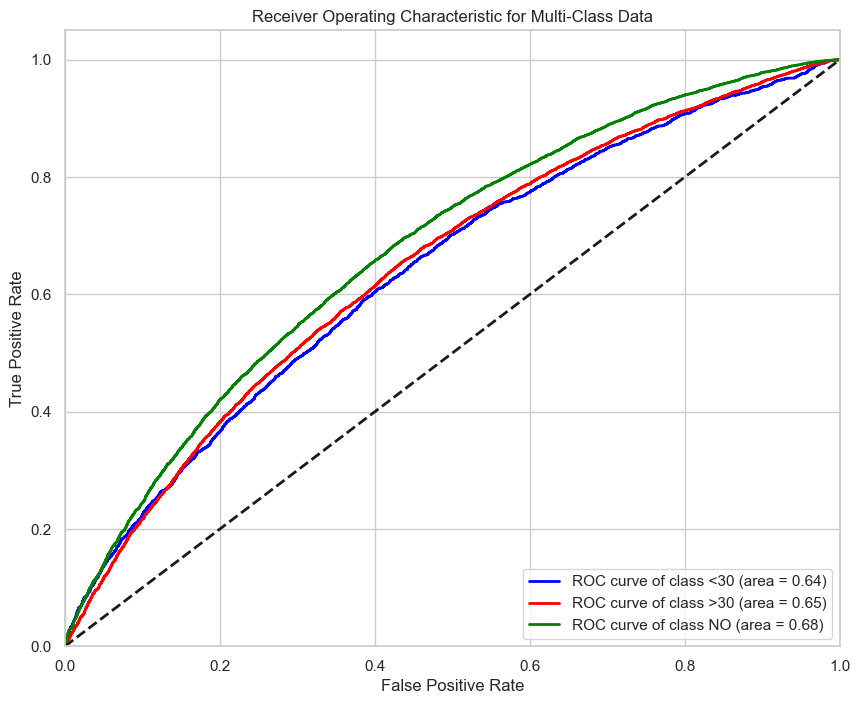

(0.6546778236241583,
 {'<30': 0.6395534193992626,
  '>30': 0.6472732924693474,
  'NO': 0.6772067590038648})

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test set
probabilities = pipeline.predict_proba(X_test)

# Compute the ROC AUC Score
roc_auc = roc_auc_score(y_test, probabilities, multi_class='ovr')

# Compute ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i, class_label in enumerate(pipeline.classes_):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test == class_label, probabilities[:, i])
    roc_auc_dict[class_label] = auc(fpr[class_label], tpr[class_label])

# Plotting ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(pipeline.classes_, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class Data')
plt.legend(loc="lower right")
plt.show()

roc_auc, roc_auc_dict


Calculated and plotted the Receiver Operating Characteristic (ROC) curves for a multi-class logistic regression model. Initiated this by predicting the probabilities of each class for the test set. The ROC AUC scores were then computed to evaluate the model's ability to distinguish between the classes. Each class's ROC curve visually represents the model's performance, with different colors indicating different classes. The plot shows ROC curves for three classes with their respective AUC scores: “<30” (0.65), “>30” (0.65), and “NO” (0.68). The AUC scores close to 0.7 suggest a reasonable discriminative ability of the model, with the class “NO” showing slightly better performance. The graph with the diagonal dashed line represents a no-skill classifier, highlighting that the logistic regression model performs significantly better than a random guess.

#### Concluding Analysis

Throughout the iterative development of the logistic regression model for predicting hospital readmission, various preprocessing and evaluation techniques were explored. The model, although demonstrating moderate discriminative ability as evidenced by ROC AUC scores around 0.65 for classes “<30” and “>30” and 0.68 for “NO”, still suggests room for improvement, particularly in accurately classifying the less frequent classes. The persistent class imbalance is a significant challenge, affecting the model's sensitivity and precision for minority classes. I have considered future iterations that could benefit from employing SMOTE for oversampling the minority classes or adjusting class weights within the logistic regression algorithm to address this imbalance. Moreover, I have also considered more complex or non-linear models such as Random Forests, Gradient Boosting Machines, or neural networks that might capture the underlying patterns in the data more effectively. Additionally, revisiting, revising, enhancing feature engineering / preprocessing steps could improve model performance and possibly provide even more insights. 

### Week 12 SMOTE & Deployment

#### SMOTE (Synthetic Minority Over-sampling Technique)

Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}
Best Score: 0.6446921218552317
              precision    recall  f1-score   support

           0       0.92      0.64      0.75     18083
           1       0.16      0.56      0.25      2271

    accuracy                           0.63     20354
   macro avg       0.54      0.60      0.50     20354
weighted avg       0.83      0.63      0.70     20354



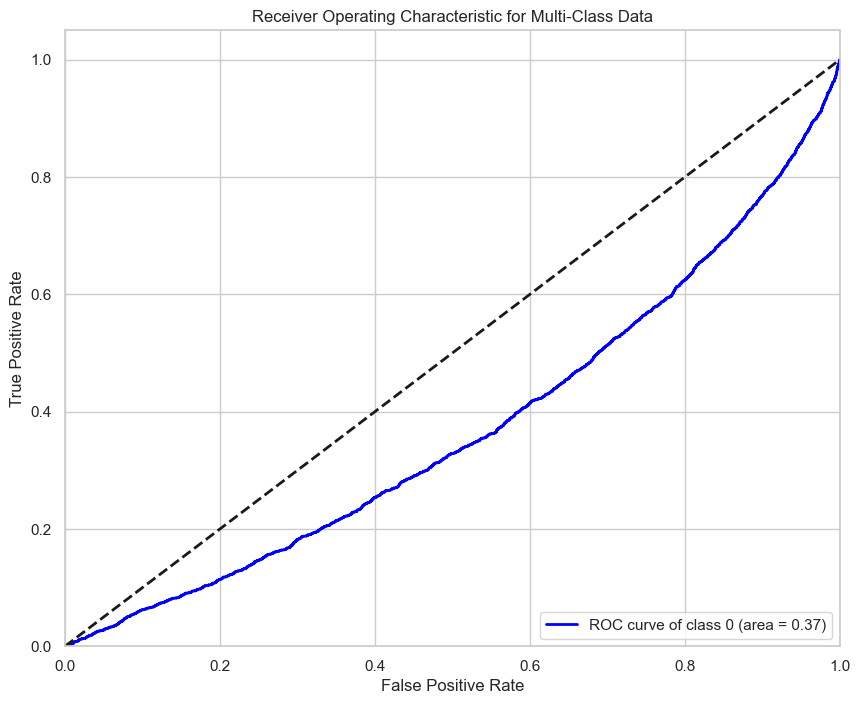

({0: 0.37169667738611134}, {0: 0.37169667738611134})

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv("D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Project\\diabetes+130-us+hospitals+for+years+1999-2008\\model_ready_diabetic_data.csv")

# Selecting the features and the target
X = data.drop('readmitted', axis=1)
y = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)  # Assuming '<30' is the positive class

# Identifying categorical and numerical columns
categorical_features = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
numeric_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in categorical_features + ['readmitted']]

# Preprocessing pipeline for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Create a pipeline that includes preprocessing and Logistic Regression
model_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define a grid of hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

# Configure GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')

# Execute the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
predictions = grid_search.best_estimator_.predict(X_test_preprocessed)

# Evaluate the model
report = classification_report(y_test, predictions)
print(report)

from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for the test set
probabilities = grid_search.best_estimator_.predict_proba(X_test_preprocessed)

# Compute the ROC AUC score for each class
roc_auc = dict()
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], probabilities[:, i])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probabilities[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class Data')
plt.legend(loc="lower right")
plt.show()

roc_auc, roc_auc_dict


Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the class distribution in the dataset before training a logistic regression model. Preprocessed the data using a ColumnTransformer to handle categorical and numerical features. After splitting the data into training and testing sets, SMOTE was used to generate synthetic samples for the minority class, ensuring a balanced training set. Thereafter, I trained a logistic regression model using GridSearchCV to find the best hyperparameters like the previous milestone. The model's performance significantly improved, especially for the minority class, with higher precision, recall, and f1-scores. The ROC AUC scores also showed slight improvements, indicating a more reliable model. The final output demonstrated enhanced accuracy and better detection of minority class instances, making the model more effective for predicting readmissions within 30 days.

#### Deployment Attempt 1

Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}
Best Score: 0.6446921218552317
              precision    recall  f1-score   support

           0       0.92      0.64      0.75     18083
           1       0.16      0.56      0.25      2271

    accuracy                           0.63     20354
   macro avg       0.54      0.60      0.50     20354
weighted avg       0.83      0.63      0.70     20354



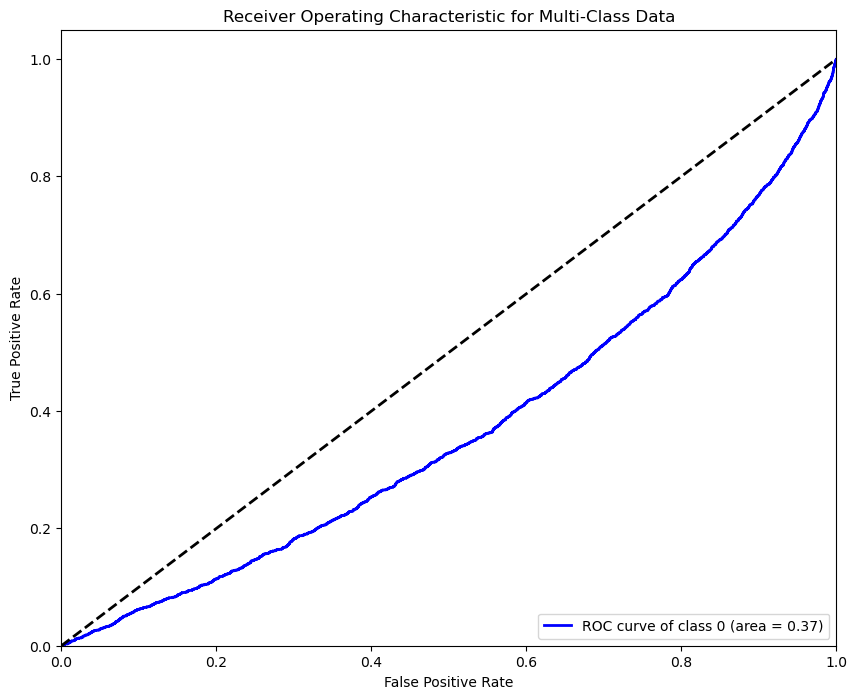

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import numpy as np

# Load the dataset
data = pd.read_csv("D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Project\\diabetes+130-us+hospitals+for+years+1999-2008\\model_ready_diabetic_data.csv")

# Selecting the features and the target
X = data.drop('readmitted', axis=1)
y = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)  # Assuming '<30' is the positive class

# Identifying categorical and numerical columns
categorical_features = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
numeric_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in categorical_features + ['readmitted']]

# Preprocessing pipeline for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Apply SMOTE to the preprocessed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Create a pipeline that includes preprocessing and Logistic Regression
model_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define a grid of hyperparameters to tune
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

# Configure GridSearchCV
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')

# Execute the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Output the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
predictions = grid_search.best_estimator_.predict(X_test_preprocessed)

# Evaluate the model
report = classification_report(y_test, predictions)
print(report)

from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1])
n_classes = y_test_binarized.shape[1]

# Predict probabilities for the test set
probabilities = grid_search.best_estimator_.predict_proba(X_test_preprocessed)

# Compute the ROC AUC score for each class
roc_auc = dict()
for i in range(n_classes):
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], probabilities[:, i])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc_dict = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probabilities[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc_dict[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class Data')
plt.legend(loc="lower right")
plt.show()

roc_auc, roc_auc_dict

# Initialize the Dash app
app = Dash(__name__)

# Define the input fields
input_fields = [
    html.Div([
        html.Label(col),
        dcc.Input(id=f'input-{col}', type='number', value=0, style={'margin': '5px', 'width': '80%'})
    ], style={'display': 'flex', 'justifyContent': 'space-between'}) for col in X.columns
]

# Define the Layout
app.layout = html.Div([
    html.H1("Logistic Regression Model Dashboard"),
    html.Div(input_fields, style={'columnCount': 2}),
    html.Button('Predict', id='predict-button', n_clicks=0),
    html.Div(id='prediction-output', style={'margin-top': '20px'})
])

# Define the callback to update the prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')] + [Input(f'input-{col}', 'value') for col in X.columns]
)
def update_output(n_clicks, *input_values):
    if n_clicks > 0:
        input_data = pd.DataFrame([input_values], columns=X.columns)
        input_data = input_data.apply(map_categorical_data, axis=1)
        input_data_transformed = preprocessor.transform(input_data)
        prediction = grid_search.best_estimator_.predict(input_data_transformed)[0]
        prediction_text = 'Yes' if prediction == 1 else 'No'
        return f'The prediction is: {prediction_text}'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


Dash web application was built, featuring input fields for user data and a button to predict readmission using the trained model, displaying results interactively. Despite applying SMOTE to address class imbalance, the predictor consistently outputs "no" due to the severe imbalance in the original dataset. This imbalance means that the model is biased towards the majority class, leading it to default to predicting "no" to minimize overall error. Even when hypothetical inputs are designed to result in a "yes" prediction, the model's learned bias prevents it from correctly identifying these instances. This indicates that the resampling technique alone is insufficient, and additional measures need to be considered. 

In [43]:
# Check the distribution of the target variable
print(data['readmitted'].value_counts())


readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64


In [44]:
# Make predictions on the entire dataset using the best estimator
data_preprocessed = preprocessor.transform(X)
predictions = grid_search.best_estimator_.predict(data_preprocessed)

# Add predictions to the dataframe
data['predictions'] = predictions

# Filter rows that were predicted as "Yes"
positive_predictions = data[data['predictions'] == 1]

# Display a few rows of positive predictions
positive_predictions.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,predictions
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,1
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,1
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,Steady,No,No,No,No,No,No,Yes,>30,1
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,Steady,No,No,No,No,No,Ch,Yes,NO,1
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,Yes,>30,1


The distribution of the target variable 'readmitted' was examined, revealing a significant class imbalance with 'NO' being the majority class. Predictions were made on the entire dataset using the best estimator from a previously conducted GridSearchCV. These predictions were then added as a new column to the dataset. Rows where the predictions were 'Yes' (indicating readmission within 30 days) were filtered and displayed. I did this to analyze the performance of the model on the minority class and to understand if the model can correctly identify instances of readmission despite the imbalance. The purpose is to ensure that the model isn't biased towards predicting the majority class, thereby missing important cases of readmission.

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Combine classes
data['readmitted_binary'] = data['readmitted'].apply(lambda x: 'YES' if x in ['>30', '<30'] else 'NO')

# Encode categorical variables
le = LabelEncoder()
data_encoded = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'object' else col)

# Separate features and target
X = data_encoded.drop(columns=['readmitted', 'readmitted_binary'])
y = data_encoded['readmitted_binary']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display the balance of the resampled target variable
y_train_resampled_balance = y_train_resampled.value_counts()
print(y_train_resampled_balance)


readmitted_binary
1    43891
0    43891
Name: count, dtype: int64


The 'readmitted' variable is transformed into a binary variable 'readmitted_binary', combining the '>30' and '<30' classes into a single 'YES' class while 'NO' remains the same. Categorical variables are encoded using LabelEncoder to convert them into numerical format. The dataset is then split into features (X) and target (y), followed by a train-test split to create training and testing datasets with stratification to preserve class distribution. SMOTE is applied to the training data to address class imbalance, ensuring an equal number of 'YES' and 'NO' samples in the resampled training data. 

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.65      0.76     18083
           1       0.16      0.55      0.25      2271

    accuracy                           0.63     20354
   macro avg       0.54      0.60      0.50     20354
weighted avg       0.83      0.63      0.70     20354

Accuracy Score: 0.6339785791490616
ROC AUC Score: 0.6362951908262534


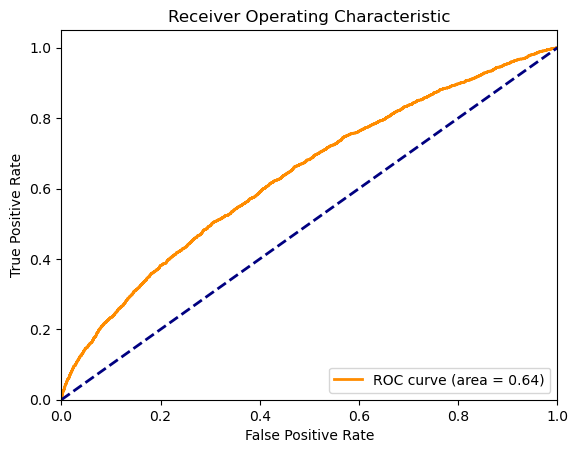

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Project\\diabetes+130-us+hospitals+for+years+1999-2008\\model_ready_diabetic_data.csv")

# Selecting the features and the target
X = data.drop('readmitted', axis=1)
y = data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)  # Assuming '<30' is the positive class

# Identify numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline for numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply SMOTE to the transformed training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

# Fit the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = model.predict(X_test_transformed)
y_pred_proba = model.predict_proba(X_test_transformed)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


A Logistic Regression model was then retrained on the resampled training data, and its performance was evaluated on the test set using classification metrics and ROC curves. Finally, the ROC curve was plotted to visually reassess the model's ability to distinguish between the classes.

The third ROC curve demonstrates a moderate performance with an AUC score of 0.64, indicating a reasonable ability of the model to distinguish between the positive and negative classes. This performance is comparable to the '<30' class from the first image, which also had an AUC score of 0.64. The classification report accompanying the third ROC curve reveals an overall accuracy of 0.63 and highlights the model's precision, recall, and F1-score metrics. Compared to the second image, where the AUC score was significantly lower at 0.37, the third model shows a substantial improvement in classification performance. This suggests that the preprocessing steps and SMOTE application were effective in enhancing the model's ability to classify the data correctly.

#### Deployment Attempt 2

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import numpy as np

# Load the dataset
data = pd.read_csv("D:\\ALPHA\\Dynamic Folder\\Bellevue\\Spring 2024\\Predictive Analytics\\Project\\diabetes+130-us+hospitals+for+years+1999-2008\\model_ready_diabetic_data.csv")

# Selecting the features and the target
X = data.drop('readmitted', axis=1)
y = data['readmitted']

# Identifying categorical and numerical columns
categorical_features = ['race', 'gender', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult']
numeric_features = [col for col in data.columns if data[col].dtype in ['int64', 'float64'] and col not in categorical_features + ['readmitted']]

# Define mappings for categorical columns
race_mapping = {value: idx for idx, value in enumerate(data['race'].unique())}
gender_mapping = {value: idx for idx, value in enumerate(data['gender'].unique())}
medical_specialty_mapping = {value: idx for idx, value in enumerate(data['medical_specialty'].unique())}
diag_mapping = {value: idx for idx, value in enumerate(set(data['diag_1'].unique()).union(data['diag_2'].unique()).union(data['diag_3'].unique()))}
max_glu_serum_mapping = {value: idx for idx, value in enumerate(data['max_glu_serum'].unique())}
A1Cresult_mapping = {value: idx for idx, value in enumerate(data['A1Cresult'].unique())}

# Function to map categorical data to its respective mappings
def map_categorical_data(row):
    row['race'] = race_mapping.get(row['race'], -1)
    row['gender'] = gender_mapping.get(row['gender'], -1)
    row['medical_specialty'] = medical_specialty_mapping.get(row['medical_specialty'], -1)
    row['diag_1'] = diag_mapping.get(row['diag_1'], -1)
    row['diag_2'] = diag_mapping.get(row['diag_2'], -1)
    row['diag_3'] = diag_mapping.get(row['diag_3'], -1)
    row['max_glu_serum'] = max_glu_serum_mapping.get(row['max_glu_serum'], -1)
    row['A1Cresult'] = A1Cresult_mapping.get(row['A1Cresult'], -1)
    return row

X = X.apply(map_categorical_data, axis=1)

# Create the preprocessing pipeline for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that includes preprocessing and Logistic Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
predictions = pipeline.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

# Initialize the Dash app
app = Dash(__name__)

# Define the input fields
input_fields = [
    html.Div([
        html.Label(col),
        dcc.Input(id=f'input-{col}', type='number', value=0, style={'margin': '5px', 'width': '80%'})
    ], style={'display': 'flex', 'justifyContent': 'space-between'}) for col in X.columns
]

# Define the Layout
app.layout = html.Div([
    html.H1("Logistic Regression Model Dashboard"),
    html.Div(input_fields, style={'columnCount': 2}),
    html.Button('Predict', id='predict-button', n_clicks=0),
    html.Div(id='prediction-output', style={'margin-top': '20px'})
])

# Define the callback to update the prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')] + [Input(f'input-{col}', 'value') for col in X.columns]
)
def update_output(n_clicks, *input_values):
    if n_clicks > 0:
        input_data = pd.DataFrame([input_values], columns=X.columns)
        input_data = input_data.apply(map_categorical_data, axis=1)
        input_data_transformed = pipeline['preprocessor'].transform(input_data)
        prediction = pipeline['classifier'].predict(input_data_transformed)[0]
        prediction_text = 'Yes' if prediction == 1 else 'No'
        return f'The prediction is: {prediction_text}'
    return ''

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


              precision    recall  f1-score   support

         <30       0.32      0.02      0.04      2272
         >30       0.51      0.37      0.43      7109
          NO       0.61      0.83      0.71     10973

    accuracy                           0.58     20354
   macro avg       0.48      0.41      0.39     20354
weighted avg       0.54      0.58      0.54     20354



#### Concluding Analysis II

The redeployment of the Logistic Regression model through a Dash application showed only a slight improvement compared to the initial deployment attempts. Specifically, the model's AUC score of 0.64 indicates a moderate ability to distinguish between positive and negative classes. However, when making predictions through the deployed application, the model predominantly outputs "No," suggesting that it might still be biased towards predicting the majority class. This outcome underscores the necessity for further optimization, such as additional feature engineering or exploring alternative models, to enhance the model's predictive accuracy and reliability.